## Problem 3.2: SIS model with m risk groups in R

Author: Emma Accorsi @emmaaccorsi 

Date: 2018-10-01

Import libraries.

In [1]:
library(deSolve)
library(ggplot2)
library(reshape2)

Specify parameter values.

In [2]:
m<-5  #Number of risk groups
beta<-0.0016*c(0,3,10,60,100)%*%t(c(0,3,10,60,100)) #Matrix of transmission rates between to risk group i (rows) from risk group j (columns)
gamma<-rep(0.2,m) #Vector of recovery rate per risk group 
n<-c(0.06,0.31,0.52,0.08,0.03) #Vector of proportion of the population that are in each risk group
x<-c(0.0,0.0,0.0,0.0,1e-5)  #Vector of initial proportions of the population that are both infectious and in each risk group
MaxTime<-30 #Number of years

Specify SIS model function.

In [3]:
sis_ode <- function(times,x,parms){
  with(as.list(c(parms,x)),{
    # ODEs
    I<-matrix(x[1:m],nrow=m,ncol=1)
    dI<-+(beta%*%I)*(n-I)-gamma*I
    list(c(dI))
  })
}

Run SIS model.

In [4]:
times<-seq(0,MaxTime,1)
parms<-list(beta=beta,gamma=gamma,n=n,m=m)
sis_out <- as.data.frame(lsoda(x,times,sis_ode,parms))

Create visualization with ggplot2

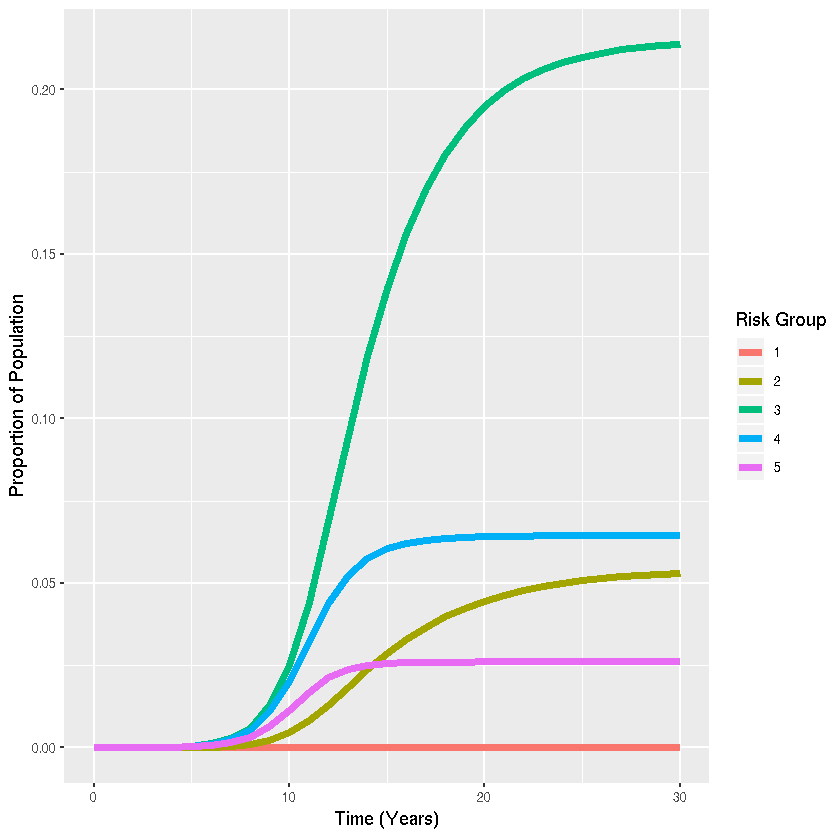

In [5]:
sis_out_long <- melt(sis_out,"time")  #Collapse dataset from "wide" to "long" format for plotting
ggplot(sis_out_long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  labs(x="Time (Years)",y="Proportion of Population",color="Risk Group")